<a href="https://colab.research.google.com/github/ehardi19/Final-Task-Machine-Learning/blob/master/Tugas_1301174099_1301174223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Pembelajaran Mesin (CSH3L3)**
Kelas IFIK-40-01 Semester Ganjil Tahun Ajaran 2019/2020



**Anggota** 


1.   Eko Hardiyanto (1301174099)
2.   Ganesha Danu Enastika (1301174223)



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### **Data Preprocessing**

In [5]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv


--2019-12-07 14:17:37--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.03s   

2019-12-07 14:17:37 (12.1 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



Baca dataset dan lihat 5 data index teratas.

In [6]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,2759800110,20141031T000000,485000.0,3,2.50,1840,8250,1.0,0,1,3,8,1340,500,1958,0,98177,47.7767,-122.378,1970.0,7920.0
3161,579000096,20141010T000000,780000.0,3,1.50,1620,7500,1.0,0,2,4,8,1620,0,1949,0,98117,47.7014,-122.381,2440.0,7800.0
3162,9169600096,20140801T000000,720000.0,2,1.50,1840,9000,1.0,0,2,3,8,1340,500,1957,0,98136,47.5281,-122.388,1880.0,7560.0
3163,1226059112,20150220T000000,415000.0,3,1.00,1360,73616,1.0,0,0,3,7,1360,0,1971,0,98072,47.7528,-122.119,2040.0,50965.0


Cek dimesi dari dataset.

In [7]:
df.shape

(3165, 21)

Cek informasi tipe data setiap kolom.

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Cek kolom yang memiliki `null` value.

In [9]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15     True
sqft_lot15        True
dtype: bool

Berdasarkan informasi diatas didapatkan kolom `sqft_living15` dan `sqft_lot15` memiliki `null` value.

Selanjutnya akan dilakukan drop baris dengan nilai `null` value tersebut.

Dilakukan juga drop kolom yang tidak memiliki korelasi. Dalam konteks ini kolom yang digunakan adalah data yang berupa numeric.

In [10]:
# Drop row dengan nilai null
df = df.dropna()

# Drop juga kolom yang tidak memiliki korelasi 
df = df.drop(['id', 'date', 'zipcode', 'yr_built', 'yr_renovated', 'lat', 'long'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340.0,5650.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690.0,7639.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720.0,8062.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360.0,5000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,431000.0,3,1.75,1630,9000,1.0,0,0,4,7,1630,0,1600.0,11120.0
3160,485000.0,3,2.50,1840,8250,1.0,0,1,3,8,1340,500,1970.0,7920.0
3161,780000.0,3,1.50,1620,7500,1.0,0,2,4,8,1620,0,2440.0,7800.0
3162,720000.0,2,1.50,1840,9000,1.0,0,2,3,8,1340,500,1880.0,7560.0


# **Supervised Learning**
---



Untuk melakukan prediksi menggunakan supervised learning, kami menggunakan **Artificial Neural Network**, hal ini dikarenakan kita tidak tau keterkaitan antar fitur dengan hasil yaitu price.

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

"""
pembentukan model neural network
"""
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu')) # activa
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

Train on 791 samples, validate on 2373 samples
Epoch 1/50
791/791 [==============================] - 0s 562us/step - loss: 388472746952.3337 - val_loss: 413856308526.4964
Epoch 2/50
791/791 [==============================] - 0s 232us/step - loss: 343746292781.3097 - val_loss: 368974376202.2487
Epoch 3/50
791/791 [==============================] - 0s 231us/step - loss: 292100674525.0468 - val_loss: 358761657460.9423
Epoch 4/50
791/791 [==============================] - 0s 251us/step - loss: 272974985068.4197 - val_loss: 344612352277.8997
Epoch 5/50
791/791 [==============================] - 0s 261us/step - loss: 255053490437.5019 - val_loss: 324464886685.1816
Epoch 6/50
791/791 [==============================] - 0s 244us/step - loss: 235891786142.2604 - val_loss: 297138306174.4357
Epoch 7/50
791/791 [==============================] - 0s 246us/step - loss: 214066820340.6726 - val_loss: 269674607470.5773
Epoch 8/50
791/791 [==============================] - 0s 250us/step - loss: 189167463

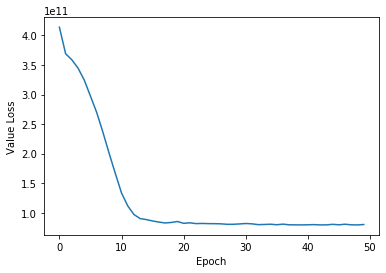

In [35]:
X = df.drop("price", axis=1).values
Y = df[["price"]].values

history = model.fit(X, Y, validation_split=0.75, epochs=50, batch_size=16, verbose=1)

print(history.history)
plt.plot(history.history['val_loss'])
plt.ylabel('Value Loss')
plt.xlabel('Epoch')
plt.show()

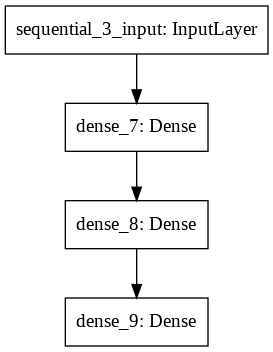

In [36]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

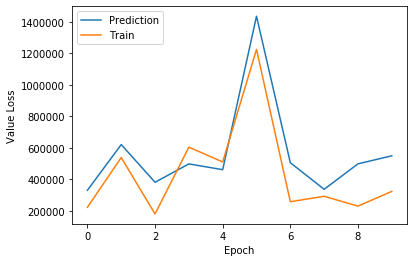

In [40]:
prediction = model.predict(X[:10])

plt.plot(prediction)
plt.plot(Y[:10])
plt.ylabel('Value Loss')
plt.xlabel('Epoch')
plt.legend(['Prediction', 'Train'], loc='upper left')
plt.show()

perbandingan hasil prediksi dengan data training

# **Unsupervised Learning**
---
## K-Means Clustering

Pada clustering digunakan algoritma **K-Means** 



Pertama akan dilakukan visualisasi dari dataset yang diberikan. Data divisualisasikan dalam bentuk **Scatter Plot** dikarenakan untuk mengetahui persebaran datanya.

Pada visualisasinya kontrol yang digunakan adalah `price` yang akan dibandingkan dengan kolom selainnya.

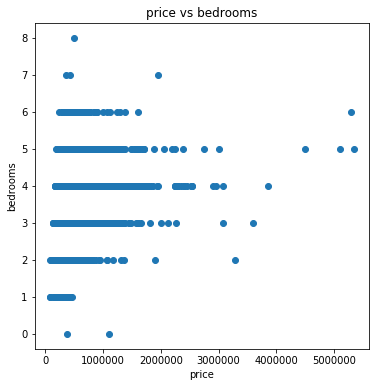

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('price vs bedrooms');

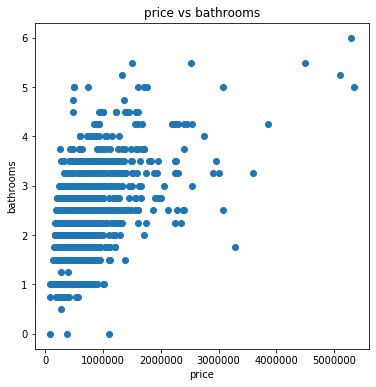

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['bathrooms'])
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title('price vs bathrooms');

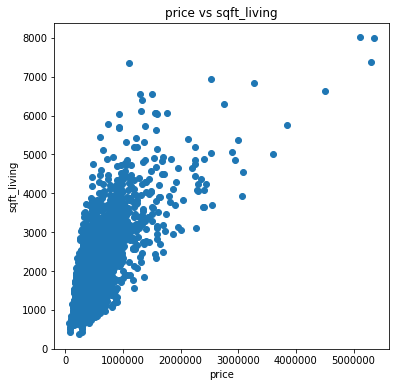

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_living'])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('price vs sqft_living');

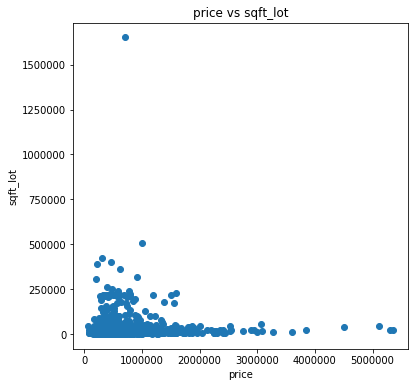

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_lot'])
plt.xlabel('price')
plt.ylabel('sqft_lot')
plt.title('price vs sqft_lot');

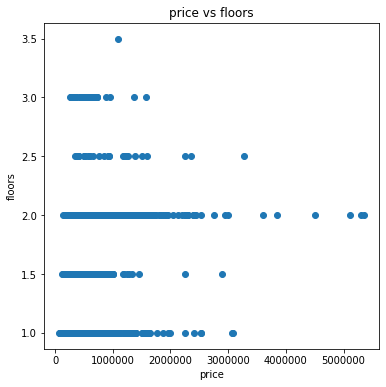

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['floors'])
plt.xlabel('price')
plt.ylabel('floors')
plt.title('price vs floors');

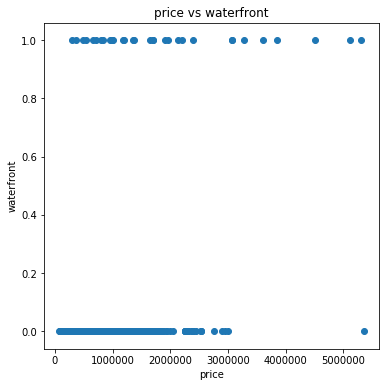

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['waterfront'])
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('price vs waterfront');

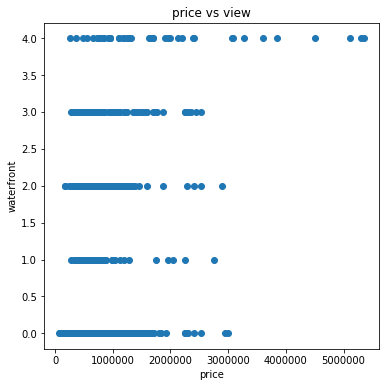

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['view'])
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('price vs view');

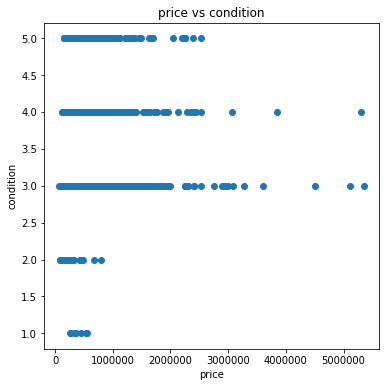

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['condition'])
plt.xlabel('price')
plt.ylabel('condition')
plt.title('price vs condition');

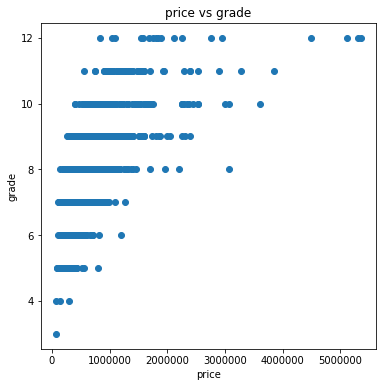

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['grade'])
plt.xlabel('price')
plt.ylabel('grade')
plt.title('price vs grade');

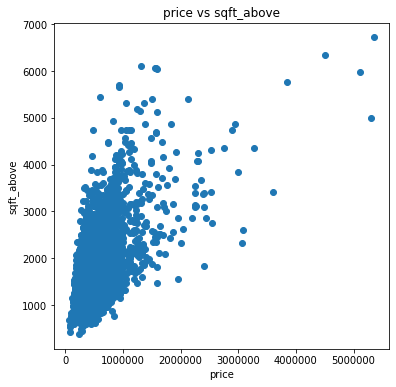

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_above'])
plt.xlabel('price')
plt.ylabel('sqft_above')
plt.title('price vs sqft_above');

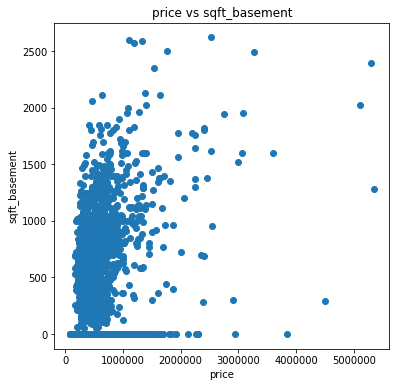

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_basement'])
plt.xlabel('price')
plt.ylabel('sqft_basement')
plt.title('price vs sqft_basement');

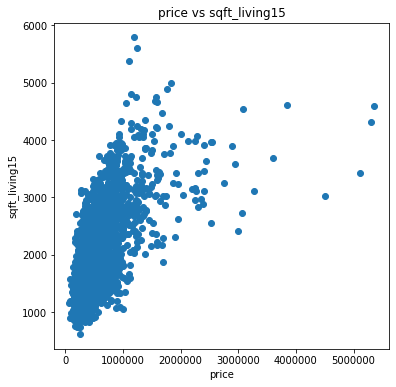

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_living15'])
plt.xlabel('price')
plt.ylabel('sqft_living15')
plt.title('price vs sqft_living15');

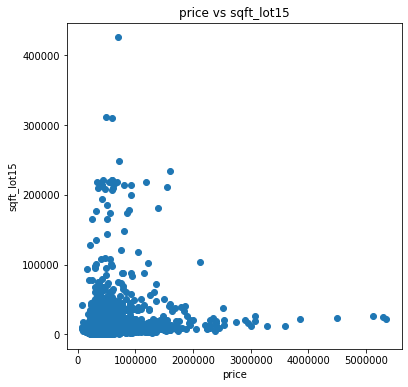

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_lot15'])
plt.xlabel('price')
plt.ylabel('sqft_lot15')
plt.title('price vs sqft_lot15');

In [0]:
from numpy.linalg import norm

class Kmeans:
    def __init__(self, n_clusters, max_iter=100, random_state=123):
      """
      Inisialisasi model dengan n_clusters, max_iter, random_state
      
      Parameter
      n_clusters = jumlah k cluster
      max_iter = maksimum iterasi dari model
      random_state = random state  
      """
      self.n_clusters = n_clusters
      self.max_iter = max_iter
      self.random_state = random_state

    def initializ_centroids(self, X):
      """
      Inisialisasi centroids dengan sebanyak random k titik

      Parameter
      X = data
      """
      np.random.RandomState(self.random_state)
      random_idx = np.random.permutation(X.shape[0])
      centroids = X[random_idx[:self.n_clusters]]
      return centroids

    def compute_centroids(self, X, labels):
      """
      Hitung centroid baru berdasarkan data

      Parameter
      X = data
      """
      centroids = np.zeros((self.n_clusters, X.shape[1]))
      for k in range(self.n_clusters):
        centroids[k, :] = np.mean(X[labels == k, :], axis=0)
      return centroids

    def compute_distance(self, X, centroids):
      """
      Menghitung jarak dari data ke centroid

      Parameter
      X = data
      labels = data-data terdekat dengan centroid
      centroids = centroid sebanyak k cluster
      """
      distance = np.zeros((X.shape[0], self.n_clusters))
      for k in range(self.n_clusters):
          row_norm = norm(X - centroids[k, :], axis=1)
          distance[:, k] = np.square(row_norm)
      return distance

    def find_closest_cluster(self, distance):
      """
      Mencari cluster terdekat dari data

      Parameter
      distance = Jarak data ke centroids
      """
      return np.argmin(distance, axis=1)
        
    def compute_sse(self, X, labels, centroids):
      """
      SSE = Sum Squared of Error
      Menghitung jumlah dari perbedaan kuadrat antara setiap observasi dan rata-rata group.

      Parameter
      X = data
      centroids = centroid sebanyak k cluster
      """
      distance = np.zeros(X.shape[0])
      for k in range(self.n_clusters):
        distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
      return np.sum(np.square(distance))

    def fit(self, X):
      """
      Proses clustering kmeans

      Parameter
      X = data
      """
      self.centroids = self.initializ_centroids(X)
      #print('Initialize centroids: \n', self.centroids, '\n')
      for i in range(self.max_iter):
        old_centroids = self.centroids
        distance = self.compute_distance(X, old_centroids)
        self.labels = self.find_closest_cluster(distance)
        self.centroids = self.compute_centroids(X, self.labels)
        #print('Iteration',i,'Centroids: \n', self.centroids, '\n')
        if np.all(old_centroids == self.centroids):
            break
        self.error = self.compute_sse(X, self.labels, self.centroids)

Pertama lakukan standarisasi data

In [0]:
X_std = StandardScaler().fit_transform(df)

Lakukan test untuk cluster **k = 2**

In [0]:
# Inisiasi Model Kmeans dengan k = 2 dan maximum iterasi adalah 100
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

Lakukan visualisasi clustering dari K-Means dengan K = 2

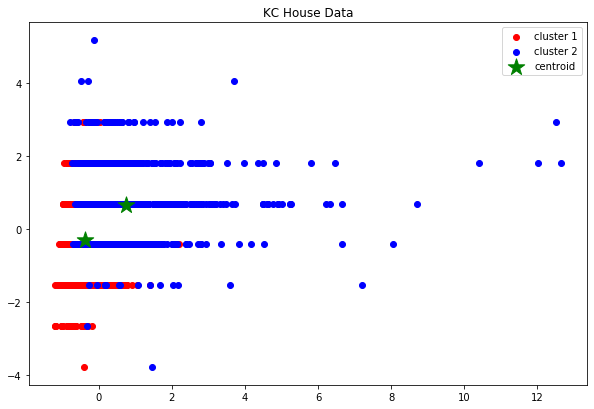

In [32]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='green', label='centroid')
plt.legend()
plt.title('KC House Data')
ax.set_aspect('equal');

Didapatkan centroid hasil akhirnya adalah

**centroid 1** 

[-0.36221173 -0.30951933 -0.41697832 -0.49617681 -0.09246795 -0.3369523
  -0.07117872 -0.1849084   0.06348247 -0.48136069 -0.50068431 -0.10475853
  -0.48340318 -0.12134315]

**centroid 2**

 [ 0.77135693  0.65914453  0.88798648  1.05664556  0.19691741  0.71756509
   0.15158039  0.39377625 -0.13519066  1.02509354  1.06624463  0.22309112
   1.02944317  0.25840931]

Lalu didapatkan **cluster 1** digambarkan berwarna **merah** dan **cluster 2** digambarkan berwarna **biru**

Lakukan pengujian dengan membandingkan K dengan Sum Square of Error

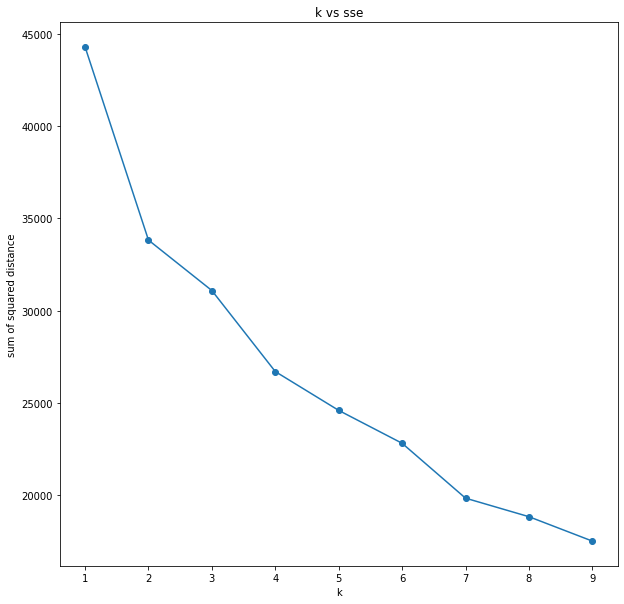

In [33]:
# Jalankan kmeans dengan k dari 1..10
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = Kmeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.error)

# Plot sse vs k
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.title('k vs sse')
plt.xlabel('k')
plt.ylabel('sum of squared distance');

Berdasarkan SSE dengan menggunakan K = 2 kita mendapatkan hasil yang tidak terlalu buruk